# Sentiment Analysis

In this project I will build a system that will be able to automatically identify emotional states (eg. anger, joy) that people express about **company's product** on twitter
For this task, I'll be using a variant of BERT; DistilBERT, the main advantage of this model is that itI is much smaller than BERT (ie. more efficient), but is able to achieve comparable performance


In [5]:
import transformers 
import datasets
import tokenizers
import pandas as pd
import numpy as np
# import panel as pn


## 1) Datset

In [9]:
train = pd.read_csv(fr"data\training.csv")
validation = pd.read_csv(fr"data\validation.csv")
test = pd.read_csv(fr"data\test.csv")

print('Dataset information:')
print(f'Training data: {train.shape}')
print(f'Validation data: {validation.shape}')
print(f'Test data: {test.shape}')

Dataset information:
Training data: (16000, 2)
Validation data: (2000, 2)
Test data: (2000, 2)


In [15]:
from datasets import Dataset,DatasetDict,Features,Value,ClassLabel

class_names = ["sadness", "joy", "love", "anger", "fear", "surprise"]
ft = Features({'text': Value('string'), 'label': ClassLabel(names=class_names)})
emotions = DatasetDict({
    "train": Dataset.from_pandas(train,features=ft),
    "test": Dataset.from_pandas(test,features=ft),
    "validation": Dataset.from_pandas(validation,features=ft)
    })
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [16]:
train_ds = emotions["train"]
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [17]:
# Convert Dataset to DataFrame 
emotions.set_format(type="pandas")
df = emotions["train"][:]


In [18]:
def label_description(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_description)
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


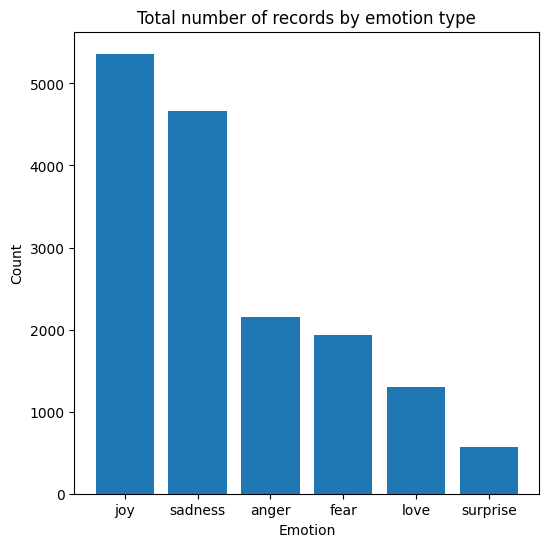

In [ ]:
# class distribution
import matplotlib.pyplot as plt
# import plotly.express as px


values_labels = df["label_name"].value_counts().reset_index()
plt.figure(figsize=[6,6])

plt.bar(height = values_labels["label_name"], x=values_labels["index"])
plt.ylabel("Count")
plt.xlabel("Emotion")
plt.title("Total number of records by emotion type")
plt.show()



In [ ]:
df["letters_per_tweet"] = df["text"].apply(lambda x: len(x))
df["letters_per_tweet"].describe()

count    16000.000000
mean        96.845812
std         55.904953
min          7.000000
25%         53.000000
50%         86.000000
75%        129.000000
max        300.000000
Name: Words_per_tweet, dtype: float64

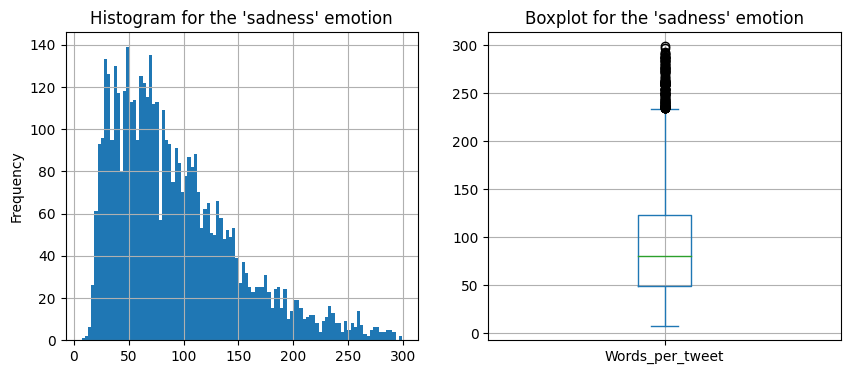

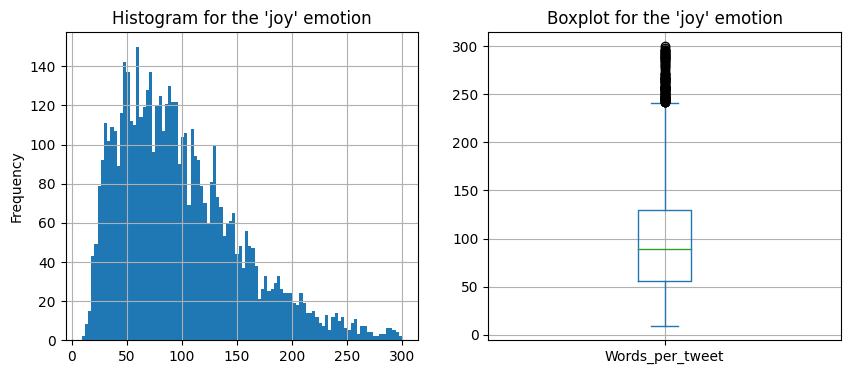

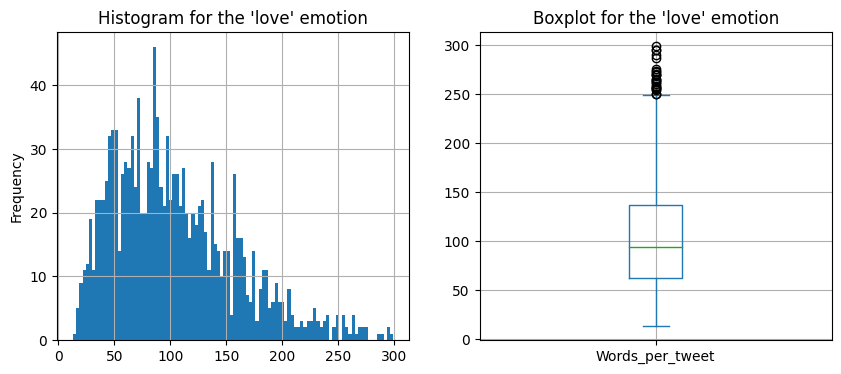

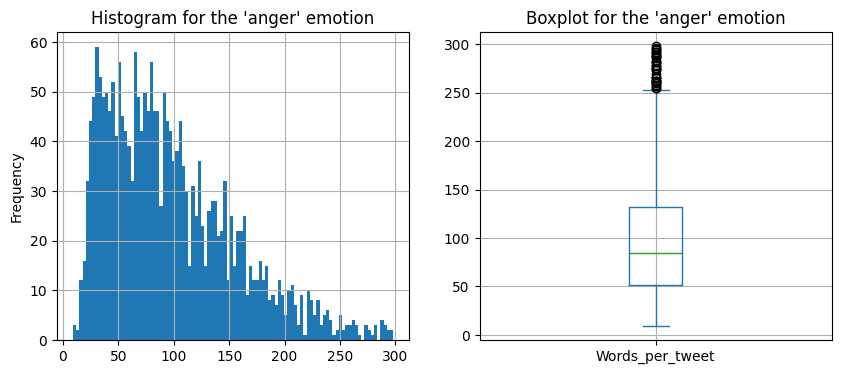

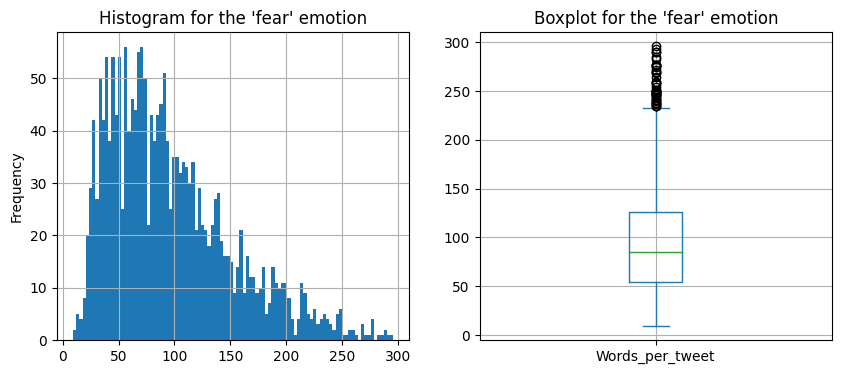

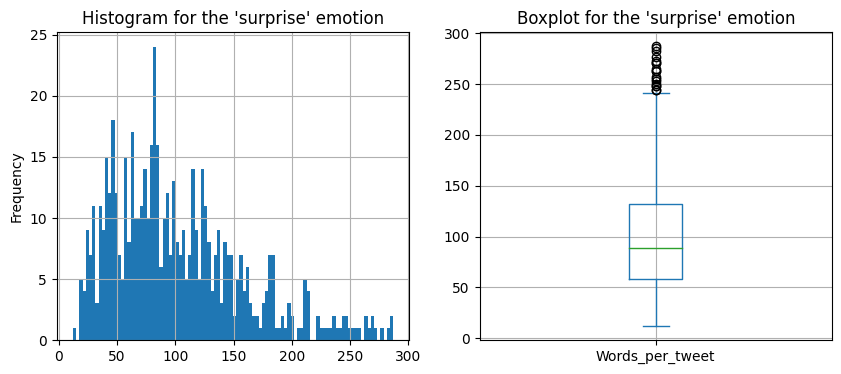

In [ ]:
# px.box(df,y='Words Per Tweet',
#        color='label_name',
#        template='plotly_white')

for n in class_names:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)  
    df[df["label_name"]==n]["letters_per_tweet"].plot(kind="hist", bins=100, title=f"Histogram for the '{n}' emotion", grid=True)
    
    plt.subplot(1, 2, 2)  
    df[df["label_name"]==n]["letters_per_tweet"].plot(kind="box", title=f"Boxplot for the '{n}' emotion", grid=True)
    
    plt.show()


